In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import List, Tuple, Optional, Dict, NamedTuple, Union, Callable
import numpy as np

In [15]:
def co_evolution():
    text = ["β1", "α1", "β2", "α2", "β3", "α3", "β4", "α4", "β5", "α5", "β6", "α6", "β7", "α7", "β8", "α8"]

    TY1_index = [[12, 18], [28, 40], [42, 46], [59, 71], [75, 83], [100, 118], [122, 130], [144, 157], [161, 167],
                 [177, 193], [199, 203], [213, 225], [229, 238], [241, 258], [261, 267], [290, 301]]
    M1_index = [[14, 20], [26, 37], [39, 43], [61, 74], [76, 81], [99, 117], [121, 129],
                [149, 162], [166, 172], [179, 194], [200, 204], [215, 228], [231, 243],
                [247, 266], [270, 276], [306, 317]]
    ty1_cubes = [[42, 46, 75, 83], [75, 83, 122, 130], [100, 118, 144, 157], [229, 238, 261, 267], [241, 258, 290, 301]]
    m1_cubes = [[76, 81, 121, 129], [99, 117, 149, 162], [231, 243, 247, 266], [247, 266, 306, 317], [231, 243, 270, 276]]
    residue_num = 318
    fig, axe = plt.subplots(figsize=(8, 7))
    plt.xlabel("Residue index", fontsize=20, fontweight="bold")
    plt.ylabel("Residue index", fontsize=20, fontweight="bold")
    plt.xlim(0, residue_num - 1)
    plt.ylim(0, residue_num - 1)
#     axe.spines['right'].set_color('none')
#     axe.spines['top'].set_color('none')
#     axe.spines['bottom'].set_position(('data', residue_num - 1))
    read_and_plot("M1", residue_num, ax=axe)

    ticks_index = []
    for tick in M1_index:
        ticks_index.append((tick[0] + tick[1]) / 2)
        # plt.plot([tick[0], tick[0]], [0, residue_num - 1], linestyle='--', linewidth=0.4, color="#3E3E3E")
        # plt.plot([tick[1], tick[1]], [0, residue_num - 1], linestyle='--', linewidth=0.4, color="#3E3E3E")
        # plt.plot([0, residue_num - 1], [tick[0], tick[0]], linestyle='--', linewidth=0.4, color="#3E3E3E")
        # plt.plot([0, residue_num - 1], [tick[1], tick[1]], linestyle='--', linewidth=0.4, color="#3E3E3E")

#     for cube in m1_cubes:
#         plt.plot([cube[0], cube[1]], [cube[3], cube[3]], linewidth=1, color="#3E3E3E")
#         plt.plot([cube[0], cube[1]], [cube[2], cube[2]], linewidth=1, color="#3E3E3E")
#         plt.plot([cube[0], cube[0]], [cube[2], cube[3]], linewidth=1, color="#3E3E3E")
#         plt.plot([cube[1], cube[1]], [cube[2], cube[3]], linewidth=1, color="#3E3E3E")

    plt.xticks(ticks_index, text, fontsize=14, family='Times New Roman', fontweight="bold")
    plt.yticks(ticks_index, text, fontsize=14, family='Times New Roman', fontweight="bold")
    plt.savefig("C:/Users/17351/Desktop/protein_fram/G11/Figs/fig8/M1_test.png", format='png', dpi=600)
    plt.show()

def read_and_plot(pdb_name, residue_num, ms: float = 1, ax: Optional[mpl.axes.Axes] = None):
    true_positives = read_data("C:/Users/homework/" + pdb_name + "true_positives.txt", residue_num)
    contacts = read_data("C:/Users/homework/" + pdb_name + "_contacts.txt", residue_num)
    index = []
    row, coln = len(true_positives), len(true_positives[0])
    for i in range(row):
        for j in range(coln):
            if true_positives[i][j] == 1:
                index.append([i, j])
    title_text = None

    # #76BDF7    #F98E8F     #15FF00
    # img = ax.imshow(masked_image, cmap=cmap, animated=animated)
    oc = ax.plot(*np.where(contacts), "o", c="#F98E8F", ms=ms)[0]
    fn = ax.plot(*np.where(true_positives), "o", c="#15FF00", ms=ms)[0]
    # tp = ax.plot(*np.where(true_positives), "o", c="r", ms=ms)[0]
    ti = ax.set_title(title_text) if title_text is not None else None
    # artists = ContactAndPredictionArtists(img, oc, fn, tp, ti)
    ax.axis("square")
    ax.set_xlim([0, residue_num])
    ax.set_ylim([0, residue_num])

def read_data(file_path, residue_num):
    f = open(file_path)
    line = f.readline()
    datas = np.zeros((residue_num, residue_num), dtype=int)
    i = 0
    while line:
        line = line.strip().split(" ")
        for j in range(residue_num):
            datas[i][j] = int(line[j])
        line = f.readline()
        i += 1
    f.close()
    print(len(datas), len(datas[0]))
    return datas

318 318
318 318


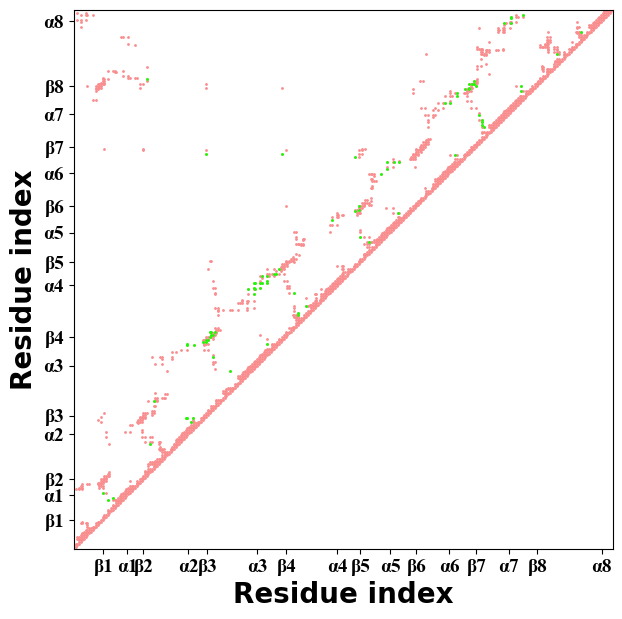

In [16]:
co_evolution()